# Question 2

We first make a function that calculates the product of a list.

In [1]:
def prod(l):
    product = 1
    for n in l:
        product *= n
    return product

Using this, we can define a binomial coefficient function.

In [2]:
def choose(n, k):
    if type(n) != int or type(k) != int:
        raise TypeError('n and k must have type int')
    elif not (n >= k >= 0):
        raise ValueError('must have n >= k >= 0')
    elif k == 0:
        return 1
    else:
        x = range(k+1, n+1)
        y = range(1, n-k+1)
        return prod(x) // prod(y)

This can be used to generate Pascal's triangle.

In [3]:
pascal = [[choose(i,j) for j in range(i+1)] for i in range(20)] # Pascal's triangle

In [4]:
strings = [' '.join(map(str, line)) for line in pascal] # convert each line of pascal to a string
maxwidth = max(map(len, strings)) # maximum line width
for string in strings:
    print string.center(maxwidth)

                                               1                                               
                                              1 1                                              
                                             1 2 1                                             
                                            1 3 3 1                                            
                                           1 4 6 4 1                                           
                                         1 5 10 10 5 1                                         
                                        1 6 15 20 15 6 1                                       
                                      1 7 21 35 35 21 7 1                                      
                                     1 8 28 56 70 56 28 8 1                                    
                                  1 9 36 84 126 126 84 36 9 1                                  
                              1 10 45 12

Now, we can define a function that calculates the probability of at least k successes in n trials with success probability p.

In [5]:
def pcoin(p, n, k):
    prob = 0
    for i in range(k, n+1):
        prob += choose(n, i) * p**i * (1-p)**(n-i) # sum the probabilities of getting k or more successes
    return prob

The probability of success in the example application is then given by:

In [6]:
pcoin(0.25, 4, 1)

0.68359375

We can check this result by simulating the experiment $N \in \{10, 100, 1000\}$ times.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
p = 0.25
n = 4
k = 1
N = [10, 100, 1000]

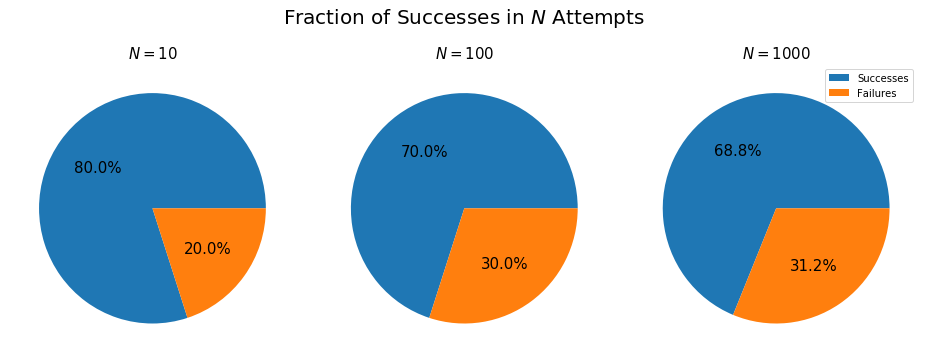

In [9]:
fig, ax = plt.subplots(1, len(N))
for i in range(len(N)):
    x = np.random.random((N[i], n)) # N[i] x n array of random values in [0,1]
    y = (x < p).sum(1)              # number of individual successful trials
    s = (y >= k).sum()              # number of tests achieving at least k successes
    
    patches, texts, autotexts = ax[i].pie([s, N[i]-s], autopct = '%.1f%%') # create a pie chart for each N
    [autotexts[j].set_fontsize(15) for j in range(2)]
    ax[i].set_title('$N = ' + str(N[i]) + '$', fontsize = 15)

legend = ax[2].legend(labels = ['Successes', 'Failures'])
fig.suptitle('Fraction of Successes in $N$ Attempts', fontsize = 20, x = 1.05, y = 1.2)
fig.subplots_adjust(left = 0, right = 2.1, bottom = 0, top = 1, wspace = 0.1)

So we can see that the simulated probability approaches the theoretical probability as $N$ becomes large.